<a href="https://colab.research.google.com/github/Ashi12218604/MNIST-digital-classifier/blob/main/Project_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
train=pd.read_csv("/content/sample_data/mnist_train_small.csv")
test=pd.read_csv("/content/sample_data/mnist_test.csv")

In [ ]:
train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 28*28 -> 784
len(train.index)

19999

In [ ]:
len(test.index)

9999

In [ ]:
test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.rename(columns={'6':"Label"},inplace=True)
test.rename(columns={'7':"Label"},inplace=True)

In [ ]:
train.head()

,Label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,Label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.isna().sum().sum()

0

#EDA

In [ ]:
#Label count
train['Label'].value_counts()


,count
Label,
1,2243
7,2126
6,2038
9,2023
3,2021
2,1989
0,1962
4,1924
8,1912


In [ ]:
count_num=[x for x in train['Label'].value_counts().sort_index()]
count_num

[1962, 2243, 1989, 2021, 1924, 1761, 2038, 2126, 1912, 2023]

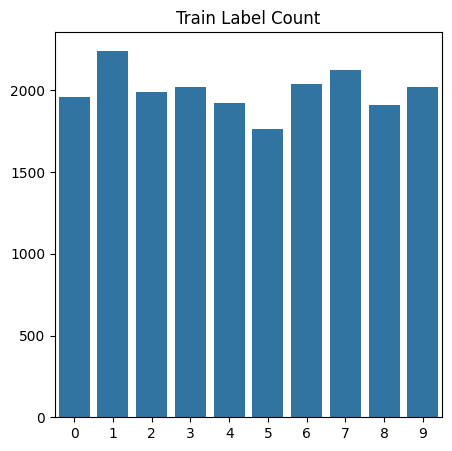

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(count_num)
plt.title("Train Label Count")
plt.show()

<ipython-input-30-1ba8f7b15518>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,ind+1)
<ipython-input-30-1ba8f7b15518>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(row[0])


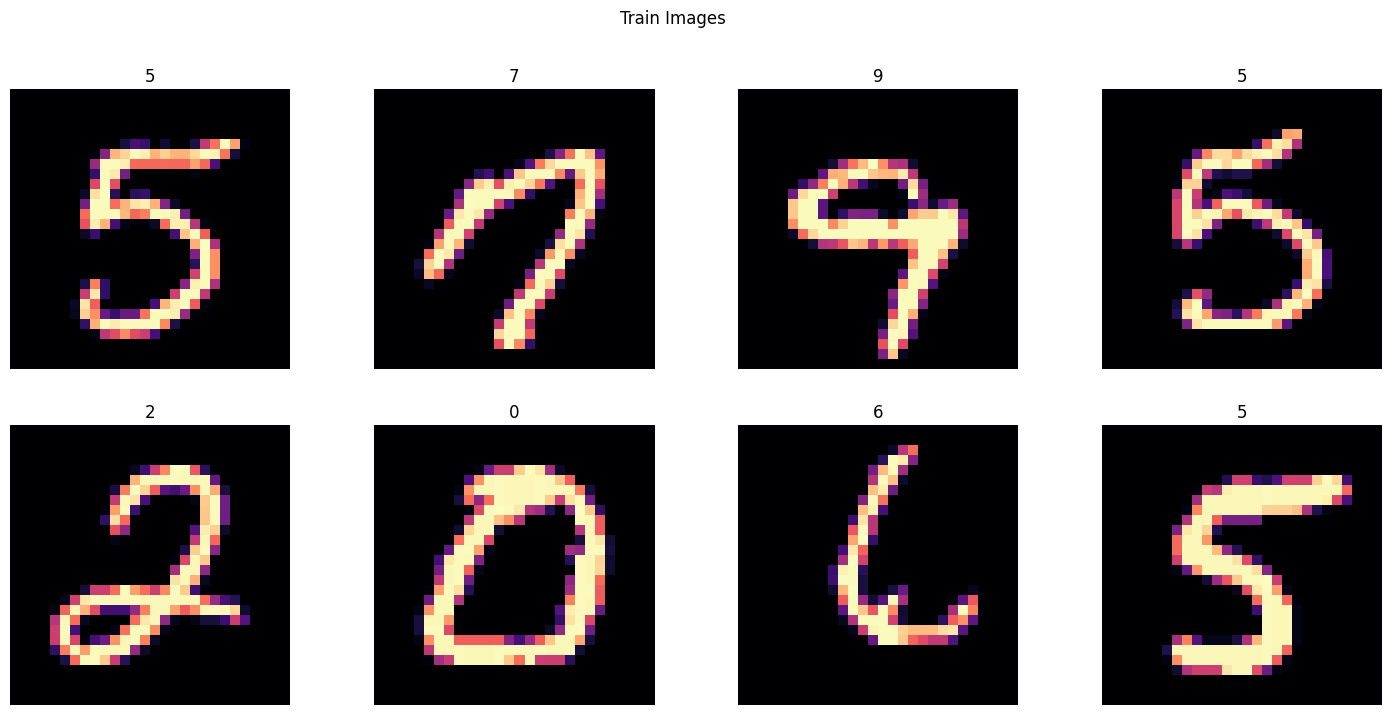

In [ ]:
fig,ax=plt.subplots(figsize=(18,8))
for ind, row in train.iloc[:8, :].iterrows():
 plt.subplot(2,4,ind+1)
 plt.title(row[0])
 img=row.to_numpy()[1:].reshape(28,28)
 fig.suptitle('Train Images')
 plt.axis('off')
 plt.imshow(img,cmap='magma')

<ipython-input-31-869ff7969785>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,ind+1)
<ipython-input-31-869ff7969785>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(row[0])


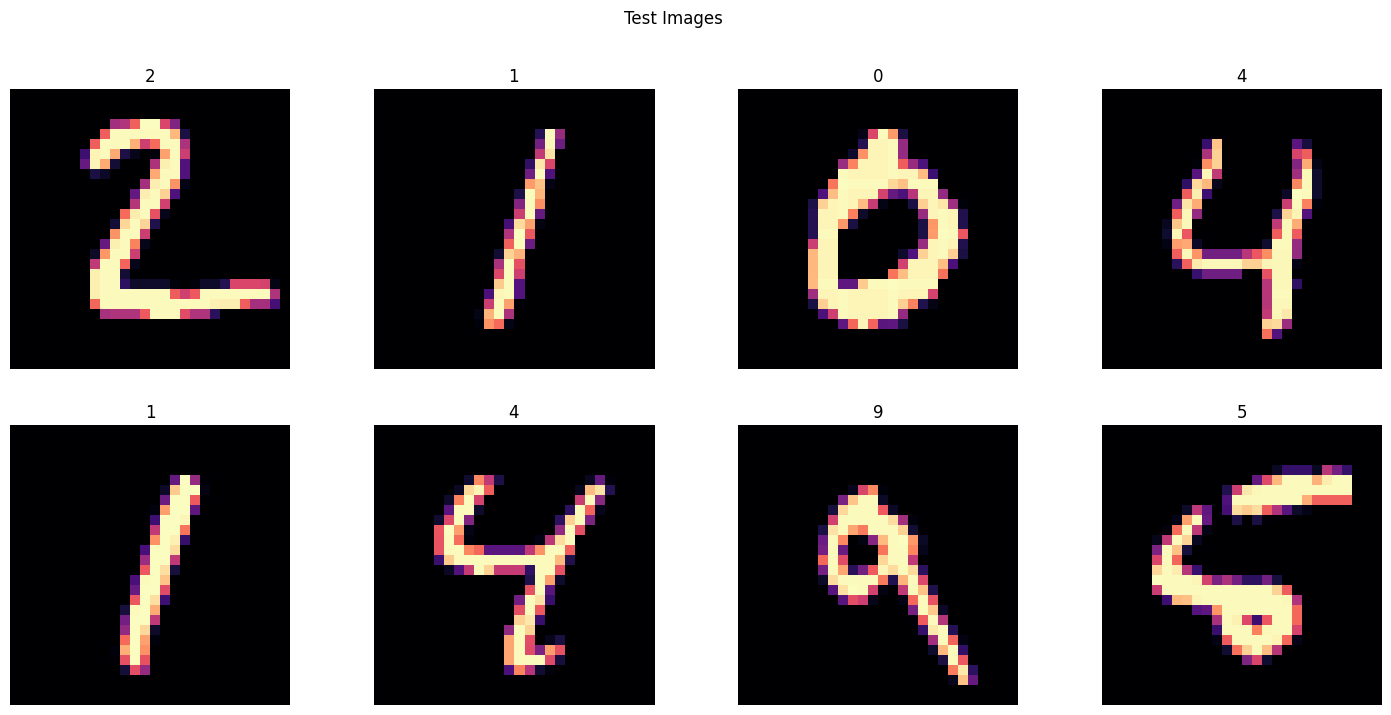

In [ ]:
fig,ax=plt.subplots(figsize=(18,8))
for ind, row in test.iloc[:8, :].iterrows():
 plt.subplot(2,4,ind+1)
 plt.title(row[0])
 img=row.to_numpy()[1:].reshape(28,28)
 fig.suptitle('Test Images')
 plt.axis('off')
 plt.imshow(img,cmap='magma')

#Pre-processing


In [ ]:
x=train.iloc[:, 1:].to_numpy()
y=train["Label"].to_numpy()

#test
x_test=test.iloc[:, 1:].to_numpy()
y_test=test["Label"].to_numpy()

for i in [x,y,x_test,y_test]:
  print(i.shape)

(19999, 784)
(19999,)
(9999, 784)
(9999,)


In [ ]:
#Normalization (converting your numbers into a single format)
x=x/255.0
x_test=x_test/255.0

## ML Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg=LogisticRegression()
logreg.fit(x,y)
y_pred_logreg=logreg.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_logreg)
print("Accuracy: ",accuracy)

Accuracy:  0.9182918291829183


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x,y)
y_pred=svc.predict(x_test)
print("Accuracy: ",accuracy_score(y_pred,y_test))     #different accuracy will come everytime

Accuracy:  0.96999699969997


In [ ]:
# Random forest ,KNN

#CNN

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
#one-hot encoding
print(y.shape)
print(y[0])

y_enc=to_categorical(y,num_classes=10)

print(y_enc.shape)
print(y_enc[0])

(19999,)
5
(19999, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
random_seed = 101
x_train, x_val, y_train_enc, y_val_enc = train_test_split(x,y_enc,test_size=0.3)

for i in [x_train, x_val, y_train_enc, y_val_enc ]:
  print(i.shape)

(13999, 784)
(6000, 784)
(13999, 10)
(6000, 10)


In [ ]:
print(x.shape)
print(x_test.shape)

x=x.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

print(x.shape)
print(x_test.shape)

(19999, 28, 28, 1)
(9999, 28, 28, 1)
(19999, 28, 28, 1)
(9999, 28, 28, 1)


In [ ]:
random_seed = 101
x_train, x_val, y_train_enc, y_val_enc = train_test_split(x,y_enc,test_size=0.3)

for i in [x_train, x_val, y_train_enc, y_val_enc ]:
  print(i.shape)

(13999, 28, 28, 1)
(6000, 28, 28, 1)
(13999, 10)
(6000, 10)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


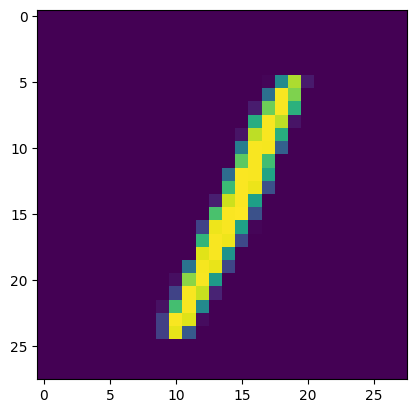

In [ ]:
#plot image
g=plt.imshow(x_train[0][:,:,0])
print(y_train_enc[0])

#Model Parameters

In [ ]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 1

In [ ]:
# CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
history = model.fit(x_train,y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.4997 - loss: 1.5192 - val_accuracy: 0.9217 - val_loss: 0.2544
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 99ms/step - accuracy: 0.9143 - loss: 0.2919 - val_accuracy: 0.9564 - val_loss: 0.1376
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.9511 - loss: 0.1620 - val_accuracy: 0.9612 - val_loss: 0.1209
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.9610 - loss: 0.1442 - val_accuracy: 0.9700 - val_loss: 0.0911
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.9727 - loss: 0.0912 - val_accuracy: 0.9757 - val_loss: 0.0775
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.9777 - loss: 0.0755 - val_accuracy: 0.9724 - val_loss: 0.0826
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.9806 - loss: 0.0624 - val_accuracy: 0.9779 - val_loss: 0.0737
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.9798 - loss: 0.0594 - val_accuracy

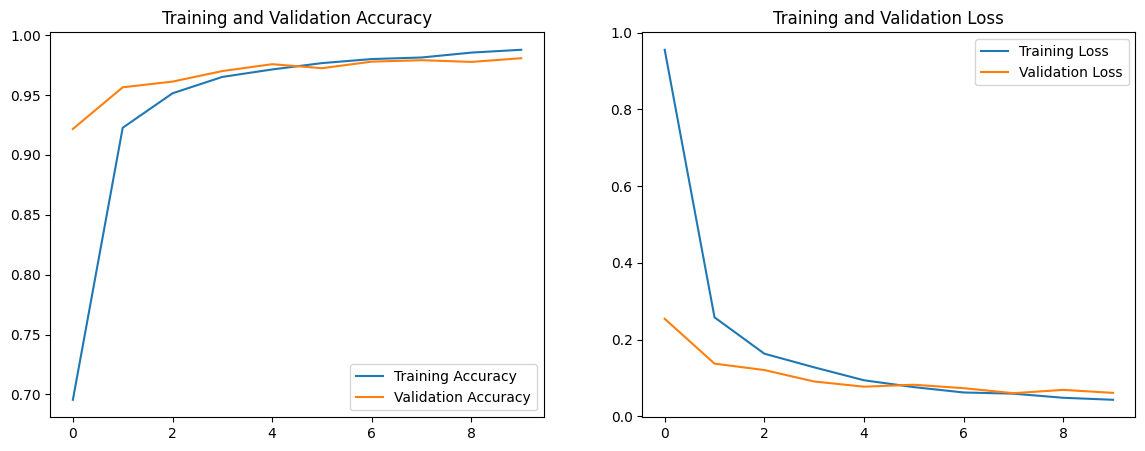

In [ ]:
# Accuracy and loss
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.savefig("./loss.png")
plt.show()

In [ ]:
# Evaluation on val data
model.evaluate(x_val,y_val_enc,verbose=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9806 - loss: 0.0554


[0.062044501304626465, 0.9806666374206543]

In [ ]:
# predicted
y_pred_enc = model.predict(x_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])


188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
[6.22282982e-07 1.01986741e-04 9.99882996e-01 5.15613556e-06
 9.67542313e-09 4.32944063e-11 1.53475088e-09 7.37103892e-06
 1.73361718e-06 1.15258345e-10]
2


In [ ]:
print(classification_report(y_act,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       572
           1       0.99      0.98      0.99       677
           2       0.98      0.98      0.98       584
           3       0.98      0.99      0.98       607
           4       0.98      0.97      0.98       545
           5       0.98      0.98      0.98       533
           6       0.99      0.99      0.99       646
           7       0.99      0.97      0.98       656
           8       0.97      0.98      0.97       548
           9       0.96      0.98      0.97       632

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



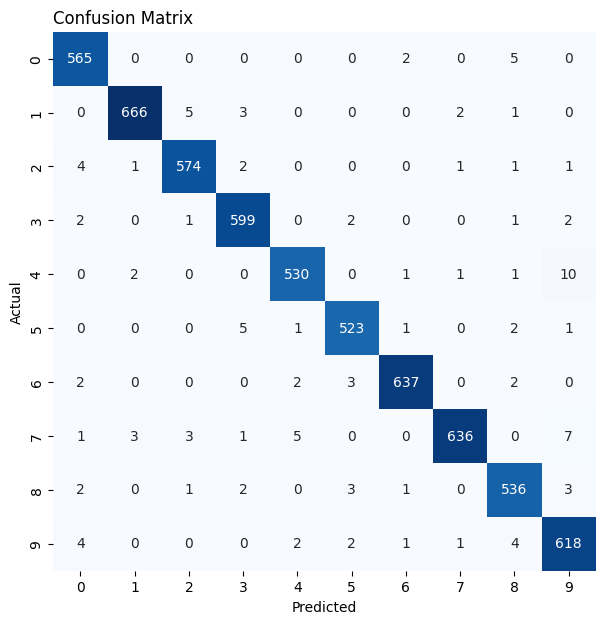

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(y_act,y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title("Confusion Matrix", loc='left')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [ ]:
# Predicting on test
y_pred_enc = model.predict(x_test)

y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
[6.62989487e-06 1.47690425e-05 9.99978006e-01 7.56577379e-08
 2.83460522e-09 2.15907218e-12 1.18178356e-07 7.55060459e-09
 2.05819333e-07 1.87316720e-12]
2


<ipython-input-86-be6f43d2f824>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,ind+1)


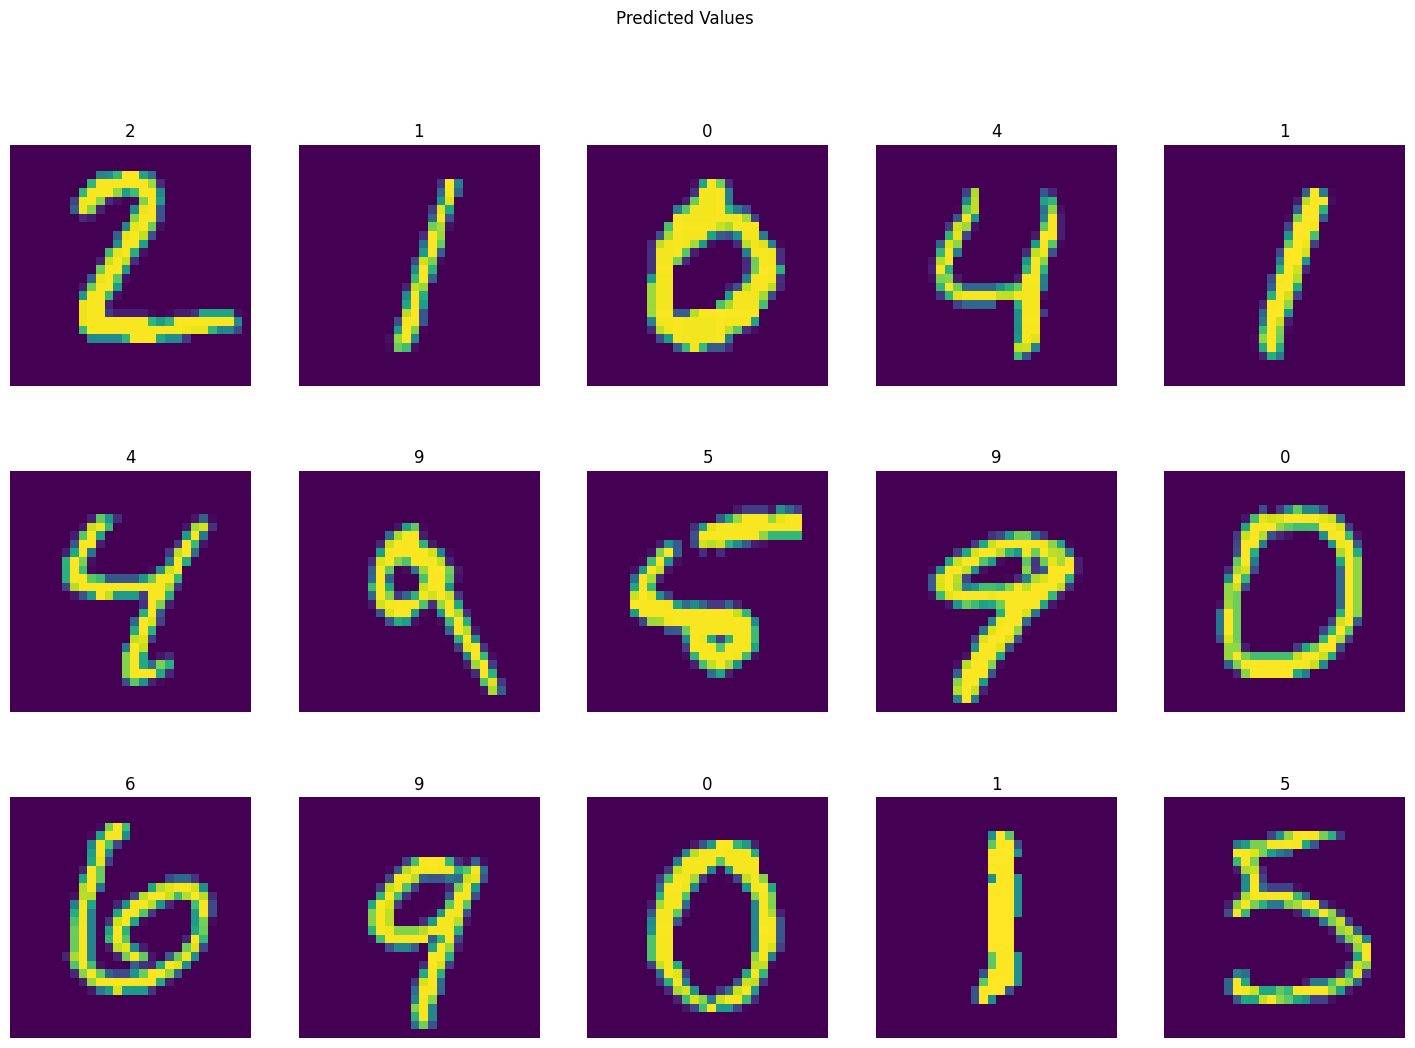

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))
for ind,row in enumerate(x_test[:15]):
  plt.subplot(3,5,ind+1)
  plt.title(y_pred[ind])
  img = row.reshape(28,28)
  fig.suptitle("Predicted Values")
  plt.axis('off')
  plt.imshow(img,cmap='viridis')

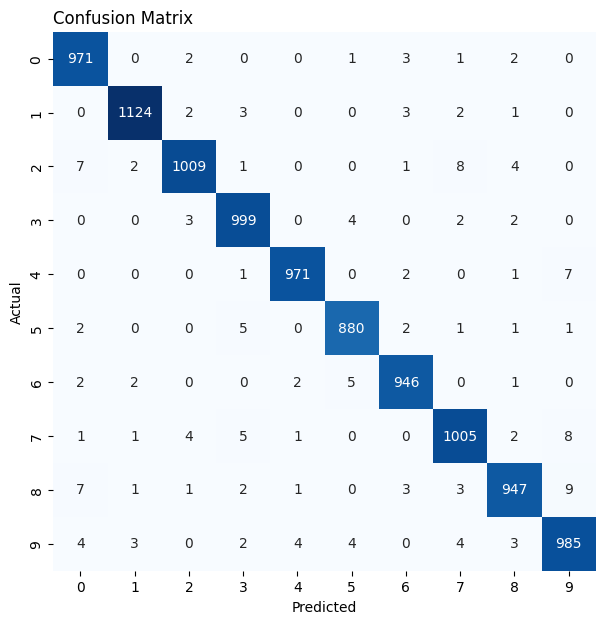

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title("Confusion Matrix", loc='left')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [ ]:
  print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1027
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98      9999
   macro avg       0.98      0.98      0.98      9999
weighted avg       0.98      0.98      0.98      9999



#Accuracy of 98%